<a href="https://colab.research.google.com/github/mannbajpai/ML-learning/blob/main/RNN_LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
(x_train, y_train) , (x_test, y_test) = imdb.load_data(num_words=2000)

17464789/17464789 [==============================] - 1s 0us/step


In [6]:
# Appying Padding
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [7]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Building the Model

In [8]:
# Define an Object
model = tf.keras.models.Sequential()

In [9]:
# Embedding Layer
model.add(tf.keras.layers.Embedding(input_dim = 20000, output_dim = 128, input_shape=(100,)))

In [10]:
# LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [11]:
# Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compiling the Model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Training The Model

In [14]:
history=model.fit(x_train,y_train,batch_size=128,epochs=6,validation_data=(x_test,y_test))

Epoch 1/6
196/196 [==============================] - 102s 510ms/step - loss: 0.5663 - accuracy: 0.6950 - val_loss: 0.4348 - val_accuracy: 0.8173
Epoch 2/6
196/196 [==============================] - 112s 575ms/step - loss: 0.3965 - accuracy: 0.8245 - val_loss: 0.3692 - val_accuracy: 0.8391
Epoch 3/6
196/196 [==============================] - 96s 489ms/step - loss: 0.3600 - accuracy: 0.8468 - val_loss: 0.4229 - val_accuracy: 0.8072
Epoch 4/6
196/196 [==============================] - 113s 579ms/step - loss: 0.3415 - accuracy: 0.8546 - val_loss: 0.3614 - val_accuracy: 0.8404
Epoch 5/6
196/196 [==============================] - 114s 584ms/step - loss: 0.3295 - accuracy: 0.8590 - val_loss: 0.4241 - val_accuracy: 0.8307
Epoch 6/6
196/196 [==============================] - 112s 574ms/step - loss: 0.3176 - accuracy: 0.8661 - val_loss: 0.3774 - val_accuracy: 0.8288


In [15]:
# Prediction
predict_x=model.predict(x_test)
y_pred=np.argmax(predict_x,axis=1)

782/782 [==============================] - 45s 56ms/step


In [19]:
print(y_pred[10]), print(y_test[10])

0
1


(None, None)

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12500     0]
 [12500     0]]


In [18]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.5


# Learning Curve

In [20]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

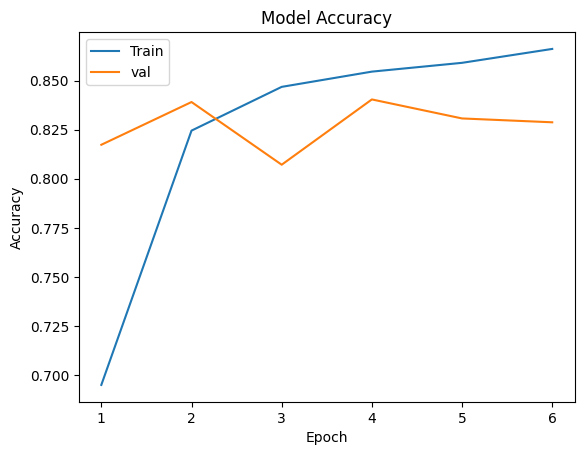

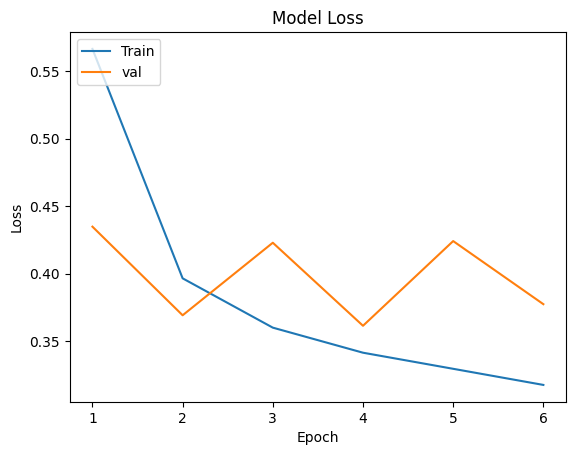

In [21]:
learning_curve(history, 6)